1. Load the Libraries

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

2. Load the pre-processed files 

In [2]:
train_df=pd.read_csv('post-processed_train.csv')
test_df=pd.read_csv('post-processed_test.csv')

3. Data Preparation for Machine Learning

In [3]:
#For the training data
# All columns as features except for the last column, and Income-per-year_encoded as target
X_train = train_df.iloc[:, :-1].values  
y_train = train_df['income-per-year_encoded'].values   

In [4]:
#For the test data
# All columns as features except for the last column, and Income-per-year_encoded as target
X_test = test_df.iloc[:, :-1].values  
y_test = test_df['income-per-year_encoded']  

4. Start of the Gaussian Naive Bayes Classifier (Before making any hyper-parameters tuning)

In [5]:
# Initialize Gaussian Naive Bayes Classifier
gnb = GaussianNB()

In [6]:
#Record the start time
start_time = time.time()

# Train the Model
gnb.fit(X_train, y_train)

# Make Predictions
y_pred_before_tuning = gnb.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred_before_tuning)
print(f"Accuracy before tuning: {accuracy * 100:.2f}%")

# Stop the timer after training
end_time = time.time()

print("Training Time for GaussianNB (Before Tuning) is:",(end_time-start_time), "seconds")

Accuracy before tuning: 79.15%
Training Time for GaussianNB (Before Tuning) is: 0.03726363182067871 seconds


In [ ]:
# Display classification report for detailed metrics
print("\nClassification Report before tuning:")
print(classification_report(y_test, y_pred_before_tuning))


Classification Report before tuning:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.66      0.31      0.42      3700

    accuracy                           0.79     15060
   macro avg       0.73      0.63      0.65     15060
weighted avg       0.77      0.79      0.76     15060



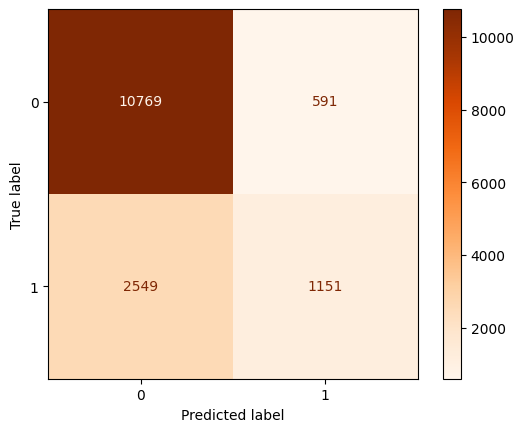

Confusion Matrix:
[[10769   591]
 [ 2549  1151]]


In [8]:
# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Step 7: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 8: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Oranges)

# Show the plot
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

5. Setup Grid Search for hyper parameter tuning

In [9]:
start_time = time.time()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]}

# Set up GridSearchCV with the GaussianNB model 
grid_search = GridSearchCV(cv=5, estimator=gnb, param_grid=param_grid, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters 
print("Best Parameters:", grid_search.best_params_)

# Stop the timer after training
end_time = time.time()

print("Training Time for GaussianNB (Search for Best Parameters) is: ", (end_time-start_time), "seconds")

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test Set Score:", test_score)



Best Parameters: {'var_smoothing': 0.001}
Training Time for GaussianNB (Search for Best Parameters) is:  1.382633924484253 seconds
Test Set Score: 0.7933598937583002


In [10]:
# Train the Naive Bayes Classifier with the best hyperparameters
nb_best = grid_search.best_estimator_
y_pred_after_tuning = nb_best.predict(X_test)

In [11]:

# Print classification report (After Tuning)
print("\nClassification Report (After Tuning):\n")
print(classification_report(y_test, y_pred_after_tuning))


Classification Report (After Tuning):

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.68      0.30      0.42      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.63      0.65     15060
weighted avg       0.78      0.79      0.76     15060

